In [ ]:
# 0. Imports and settings

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [7]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

# 1 Bias-Variance Trade-Off

Figure 5-26 page 366 
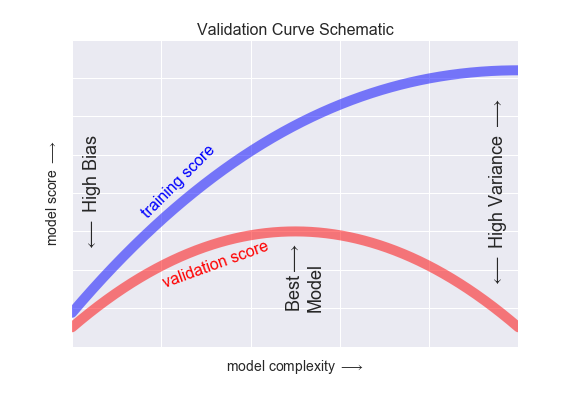

## 1.1 Under/Over fitting

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [9]:
poly_pipeline = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())

Demonstrating Polynomial Features

In [10]:
x = np.array([2, 3, 4])
poly = PolynomialFeatures(degree=3, include_bias=False) #will to the power of degree for each example
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [11]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

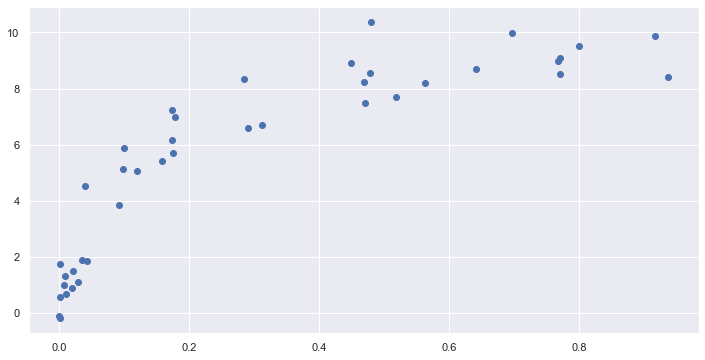

In [12]:
plt.scatter(X,y)

Demonstrating pipeline fit

In [13]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

In [14]:
poly_pipeline.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [15]:
y_test = poly_pipeline.predict(X_test)

Systematically fitting

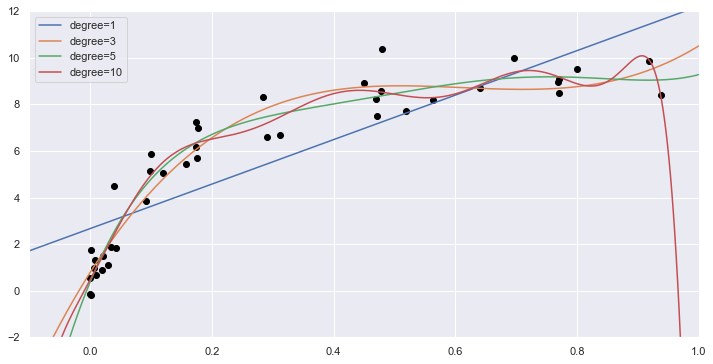

In [16]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5, 10]:
    poly_pipeline = make_pipeline(PolynomialFeatures(degree=degree),LinearRegression())
    y_test = poly_pipeline.fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## 1.2 Validation Curve

In [24]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [32]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

ModuleNotFoundError: No module named 'sklearn.learning_curve'

In [ ]:
#validation_curve()

In [19]:
plt.plot(degree, np.median(train_score, 1), '-o', color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), '-o', color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

NameError: name 'train_score' is not defined

Optimal trade-off looks like degree 3: let's see how it fits

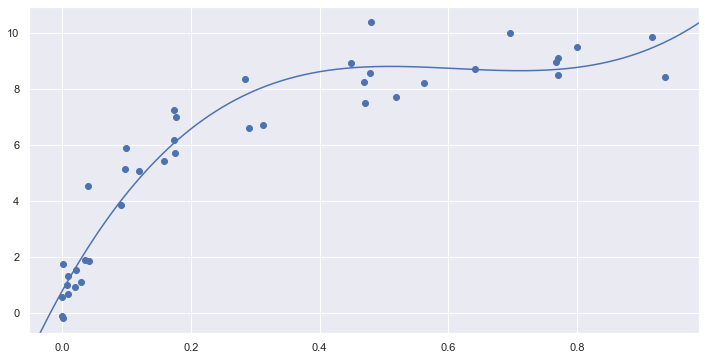

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## 1.3 Learning Curves

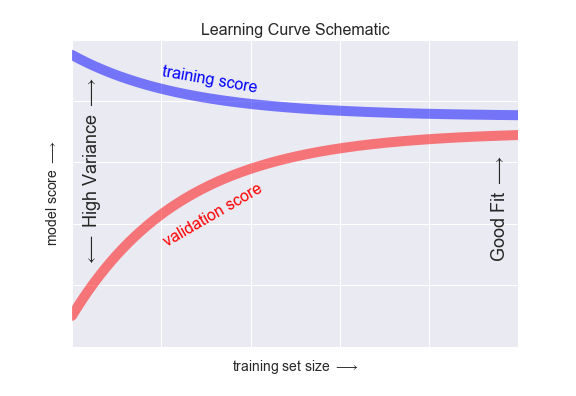

General behaviors:
- Given a complexity: overfit a small dataset, underfit a large dataset

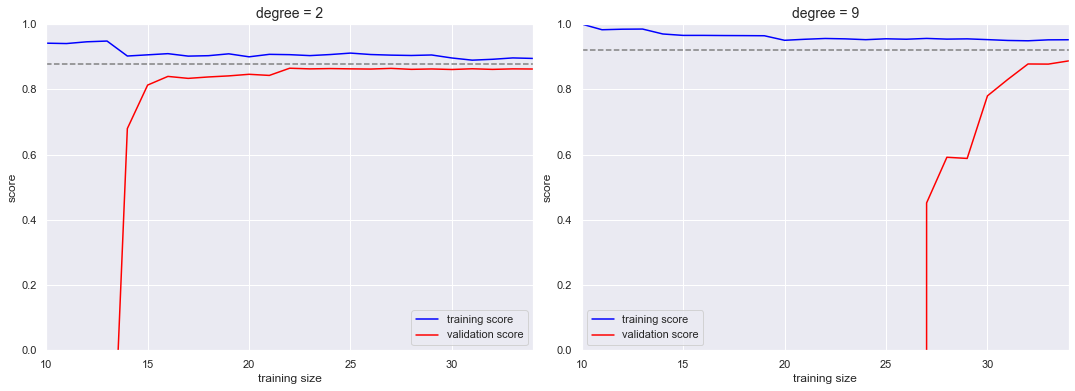

In [ ]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

## 1.4 Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
grid.get_params()

{'cv': 7,
 'error_score': 'raise',
 'estimator__memory': None,
 'estimator__steps': [('polynomialfeatures',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
  ('linearregression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))],
 'estimator__polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'estimator__linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'estimator__polynomialfeatures__degree': 2,
 'estimator__polynomialfeatures__include_bias': True,
 'estimator__polynomialfeatures__interaction_only': False,
 'estimator__linearregression__copy_X': True,
 'estimator__linearregression__fit_intercept': True,
 'estimator__linearregression__n_jobs': 1,
 'estimator__linearregression__normalize': False,
 'estimator': Pipeline(memory=None,
      steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [ ]:
model = grid.best_estimator_

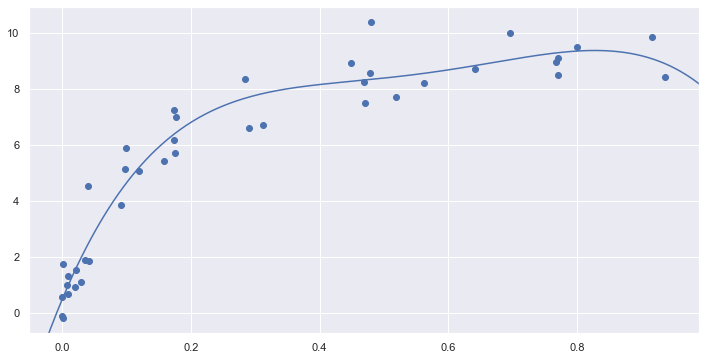

In [ ]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);